In [1]:
# Dataset: Telecom customer data (e.g., from Kaggle)
import pandas as pd

data = pd.read_csv("customer_churn_data.csv")
print(data.head())

  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0000    Male              0      No        Yes      23           No   
1   CUST0001  Female              0     Yes         No      43           No   
2   CUST0002    Male              1      No         No      51          Yes   
3   CUST0003    Male              1      No         No      72          Yes   
4   CUST0004    Male              1      No         No      25          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service              No  No internet service  ...   
1  No phone service             DSL                  Yes  ...   
2                No             DSL                   No  ...   
3               Yes             DSL                  Yes  ...   
4               Yes             DSL                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service  

In [7]:
# Data preprocessing (handling missing values, outliers, feature scaling)
import numpy as np
from sklearn.preprocessing import StandardScaler

for col in data.select_dtypes(include=['object']):
    data[col] = data[col].fillna(data[col].mode()[0])

for col in data.select_dtypes(include=[np.number]):
    data[col] = data[col].fillna(data[col].mean())
    
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [15]:
# Exploratory data analysis (EDA) to identify potential predictors
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes'].values

In [16]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Building a simple linear /logistic regression model
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.asarray(z)  # Ensure z is a numpy array
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip to prevent overflow

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradient Descent
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

In [18]:
# Initialize and train the model
model = LogisticRegressionScratch(learning_rate=0.01, n_iter=1000)
model.fit(X_train.values.astype(float), y_train.astype(float))  # Ensure types are correct

# Predictions
y_pred = model.predict(X_test.values.astype(float))

In [20]:
# Evaluating model performance using accuracy, precision, recall, F1-score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.50
Precision: 0.51
Recall: 0.26
F1 Score: 0.34


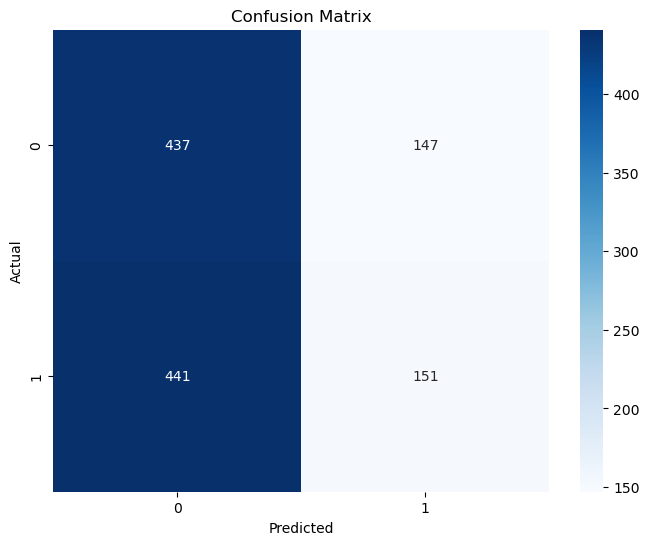

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()